In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install openpyxl

In [ ]:
df = pd.read_excel('Data Analyst Role - Mock Dataset.xlsx') #import excel file

In [ ]:
df.head(10)

,Start Date,End Date,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,COMPANY as an organization values diversity,Leadership understands diversity is critical to our future success,...,I feel COMPANY respects my work and personal life balance,The process for career advancement/promotion is transparent to all employees,People from all backgrounds and with a range of identities have equitable opportunities to advance their careers at COMPANY,I feel supported in my career growth and development at COMPANY,I believe that my total compensation is fair relative to other employees in similar roles at COMPANY,How would you best describe your role?,What racial/ethnicity groups do you identify with? Select all that apply. - Selected Choice,How do you describe your gender identity? Select all that apply. - Selected Choice,How do you like to describe your sexual identity? Select all that apply. - Selected Choice,"Are you a person with mental health accessibility needs (undiagnosed or diagnosed)? (ie. Including but not limited to: Addiction, Anxiety, Bipolar Disorder, Depression)"
0,2021-06-10 07:39:22,2021-06-10 07:46:15,412,True,2021-06-10 07:46:16.207,R_3lzQOuHZohBQXJQ,anonymous,EN,Agree,Agree,...,Neutral,Disagree,Agree,Agree,Neutral,Senior,White,Man,Heterosexual,No
1,2021-06-10 07:35:26,2021-06-10 07:46:26,660,True,2021-06-10 07:46:27.352,R_3flsoEJR01nit1Z,anonymous,EN,Agree,Agree,...,Agree,Neutral,Neutral,Agree,Agree,Intermediate,White,Man,Heterosexual,No
2,2021-06-10 07:31:53,2021-06-10 07:49:44,1071,True,2021-06-10 07:49:45.773,R_2fiZPxUIkUJqZkN,anonymous,EN,Strongly Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Other,White,Woman,Heterosexual,No
3,2021-06-10 07:32:05,2021-06-10 07:53:18,1273,True,2021-06-10 07:53:20.021,R_9Ghvahv35yoO6AN,anonymous,EN,Agree,Agree,...,Strongly Agree,Neutral,Agree,Agree,Neutral,Intermediate,White,Man,Heterosexual,No
4,2021-06-10 07:36:46,2021-06-10 07:53:21,995,True,2021-06-10 07:53:22.655,R_27UKLrRWKB8m7uL,anonymous,EN,Neutral,Agree,...,Agree,Neutral,Disagree,Neutral,Disagree,Junior,"South Asian (e.g., Afghanistan, Bangladesh, In...",Woman,Prefer not to answer,No
5,2021-06-10 07:38:52,2021-06-10 07:54:46,953,True,2021-06-10 07:54:47.071,R_9yReRR2RKxs7dbH,anonymous,EN,Neutral,Neutral,...,Agree,Neutral,Neutral,Neutral,Agree,Senior,White,Woman,Heterosexual,Yes
6,2021-06-10 07:44:59,2021-06-10 07:55:01,601,True,2021-06-10 07:55:03.606,R_1g0XgcEsnnuJqa3,anonymous,EN,Agree,Agree,...,Agree,Disagree,Neutral,Agree,Agree,Intermediate,White,Man,Heterosexual,No
7,2021-06-10 07:35:56,2021-06-10 07:56:00,1204,True,2021-06-10 07:56:01.873,R_1od9ipAIzi8qltN,anonymous,EN,Neutral,Agree,...,Agree,Agree,Neutral,Strongly Agree,Agree,Manager,White,Man,Heterosexual,Yes
8,2021-06-10 07:32:31,2021-06-10 07:58:07,1535,True,2021-06-10 07:58:08.054,R_3MJxNKfYxenS2ef,anonymous,EN,Neutral,Agree,...,Neutral,Disagree,Agree,Agree,Agree,Junior,White,Woman,Heterosexual,No
9,2021-06-10 07:34:04,2021-06-10 08:00:59,1614,True,2021-06-10 08:01:00.526,R_1CEmQ9aI630kbhX,anonymous,EN,Neutral,Agree,...,Neutral,Neutral,Neutral,Agree,Strongly Agree,Prefer not to answer,Prefer not to answer,Prefer not to answer,Heterosexual,Yes


## Define Question Columns that employees were supposed to answer

In [ ]:
question_columns = df.columns[8:19]

##  Calculate the top two box score for each question columns


In [ ]:
top_two_box_scores = {}
total_responses = len(df)

for column in question_columns:
    positive_responses = df[column].isin(['Agree', 'Strongly Agree']).sum()
    top_two_box_scores[column] = (positive_responses / total_responses) * 100

In [ ]:
# Sort the results in descending order
sorted_top_two_box_scores = dict(sorted(top_two_box_scores.items(), key=lambda item: item[1], reverse=True))

In [ ]:
# Display the top two box scores
for column, score in sorted_top_two_box_scores.items():
    print(f"{column}: \033[1m{score:.2f}%\033[0m")

Leadership makes an effort to create a space that is welcoming for all: 84.25%
COMPANY as an organization values diversity: 83.90%
Leadership understands diversity is critical to our future success: 78.77%
I feel supported in my career growth and development at COMPANY: 78.77%
I feel COMPANY respects my work and personal life balance: 73.29%
I feel comfortable sharing all parts of my identity with my colleagues: 72.60%
I feel comfortable to share my opinion without fear of negative consequences: 71.58%
I feel my unique background and identity (i.e. my differences) are valued at COMPANY: 70.89%
COMPANY as an organization represents a diverse group of people (e.g., race, gender identity, age, disability, sexual identity, education, religion, etc.): 70.21%
People from all backgrounds and with a range of identities have equitable opportunities to advance their careers at COMPANY: 67.47%
The process for career advancement/promotion is transparent to all employees: 43.84%


## Calculate Top two box score for Company Overall

In [ ]:
positive_responses_sum = 0
responses_sum = 0

for column in question_columns:
    positive_responses = df[column].isin(['Agree', 'Strongly Agree']).sum()
    total_responses = df[column].count()  # Get the total responses for each question
    positive_responses_sum += positive_responses
    responses_sum += total_responses

# Calculate overall top two box score
overall_top_two_box_score = (positive_responses_sum / responses_sum) * 100

print(f"Overall Top Two Box Score for the company: {overall_top_two_box_score:.2f}%")


Overall Top Two Box Score for the company: 72.32%


## Calculate two box score for Men and Women

In [ ]:
# create subset dataframes for men and women
df_men = df[df['How do you describe your gender identity? Select all that apply. - Selected Choice'] == 'Man']
df_women = df[df['How do you describe your gender identity? Select all that apply. - Selected Choice'] == 'Woman']

# choose the question columns
question_columns = df.columns[8:19]

top_2_box_men = {}
top_2_box_women = {}

# iterate over the question columns
for col in question_columns:
    top_2_box_men[col] = ((df_men[col] == 'Agree') | (df_men[col] == 'Strongly Agree')).mean() * 100
    top_2_box_women[col] = ((df_women[col] == 'Agree') | (df_women[col] == 'Strongly Agree')).mean() * 100

# convert to DataFrame
top_2_box_men_df = pd.DataFrame.from_dict(top_2_box_men, orient='index', columns=['Top-2-Box Score for Men'])
top_2_box_women_df = pd.DataFrame.from_dict(top_2_box_women, orient='index', columns=['Top-2-Box Score for Women'])

# print the results
print(top_2_box_men_df)
print(top_2_box_women_df)

top_2_box_men_df.to_excel('top_2_box_men_df.xlsx')
top_2_box_women_df.to_excel('top_2_box_women_df.xlsx')

                                                    Top-2-Box Score for Men
COMPANY as an organization values diversity                       89.617486
Leadership understands diversity is critical to...                83.606557
COMPANY as an organization represents a diverse...                74.863388
I feel my unique background and identity (i.e. ...                75.956284
I feel comfortable sharing all parts of my iden...                77.049180
I feel comfortable to share my opinion without ...                81.420765
Leadership makes an effort to create a space th...                89.617486
I feel COMPANY respects my work and personal li...                74.863388
The process for career advancement/promotion is...                49.726776
People from all backgrounds and with a range of...                75.409836
I feel supported in my career growth and develo...                85.792350
                                                    Top-2-Box Score for Women
COMPANY as

## Calculate two box score for each Role -

In [ ]:
# create subset dataframes for each role
roles = ['Junior', 'Intermediate', 'Manager', 'Senior']  # define the roles

top_2_box_roles = {}

# iterate over roles
for role in roles:
    df_role = df[df['How would you best describe your role?'] == role]

    top_2_box_role = {}
    # iterate over the question columns
    for col in question_columns:
        top_2_box_role[col] = ((df_role[col] == 'Agree') | (df_role[col] == 'Strongly Agree')).mean() * 100

    top_2_box_roles[role] = top_2_box_role

# convert to DataFrame
top_2_box_roles_df = pd.DataFrame(top_2_box_roles)

# print the result
print(top_2_box_roles_df)

top_2_box_roles_df.to_excel('top_2_box_roles.xlsx')

                                                       Junior  Intermediate  \
COMPANY as an organization values diversity         80.000000     85.714286   
Leadership understands diversity is critical to...  73.333333     82.857143   
COMPANY as an organization represents a diverse...  75.000000     68.571429   
I feel my unique background and identity (i.e. ...  65.000000     81.428571   
I feel comfortable sharing all parts of my iden...  70.000000     70.000000   
I feel comfortable to share my opinion without ...  66.666667     68.571429   
Leadership makes an effort to create a space th...  76.666667     84.285714   
I feel COMPANY respects my work and personal li...  76.666667     64.285714   
The process for career advancement/promotion is...  36.666667     45.714286   
People from all backgrounds and with a range of...  68.333333     68.571429   
I feel supported in my career growth and develo...  80.000000     78.571429   

                                                   

## For each Racial Group

In [ ]:
# create a new column for racial group
def classify_race(race):
    if race == 'White':
        return 'White'
    elif race == 'Black':
        return 'Black'
    else:
        return 'Indigenous and People of Colour'

df['Racial Group'] = df['What racial/ethnicity groups do you identify with? Select all that apply. - Selected Choice'].apply(classify_race)

# create a mask for top-2-box values
mask = (df[question_columns] == 'Agree') | (df[question_columns] == 'Strongly Agree')

# group by racial group and calculate mean
top_2_box_by_race = mask.groupby(df['Racial Group']).mean() * 100

# transpose the DataFrame
transposed_df = top_2_box_by_race.transpose()

# print the result
print(transposed_df)

# Export to Excel
transposed_df.to_excel('top_2_box_by_race.xlsx')

Racial Group                                        Indigenous and People of Colour  \
COMPANY as an organization values diversity                               79.279279   
Leadership understands diversity is critical to...                        74.774775   
COMPANY as an organization represents a diverse...                        78.378378   
I feel my unique background and identity (i.e. ...                        67.567568   
I feel comfortable sharing all parts of my iden...                        66.666667   
I feel comfortable to share my opinion without ...                        67.567568   
Leadership makes an effort to create a space th...                        83.783784   
I feel COMPANY respects my work and personal li...                        72.972973   
The process for career advancement/promotion is...                        51.351351   
People from all backgrounds and with a range of...                        67.567568   
I feel supported in my career growth and de

## For each Sexual Identity

In [ ]:
# create a new column for sexual identity group
def classify_sexual_identity(identity):
    if identity == 'Heterosexual':
        return 'Heterosexual'
    elif identity not in ['Prefer not to answer', 'Another sexual identity not listed above (please specify in comment box)']:
        return 'LGBTQ+'
    else:
        return None

df['Sexual Identity Group'] = df['How do you like to describe your sexual identity? Select all that apply. - Selected Choice'].apply(classify_sexual_identity)

# create a mask for top-2-box values
mask = (df[question_columns] == 'Agree') | (df[question_columns] == 'Strongly Agree')

# group by sexual identity group and calculate mean
top_2_box_by_sexual_identity = mask.groupby(df['Sexual Identity Group']).mean() * 100

# transpose the DataFrame
transposed_df = top_2_box_by_sexual_identity.transpose()

# print the result
print(transposed_df)

# Export to Excel
transposed_df.to_excel('box_by_sexual_identity.xlsx')


Sexual Identity Group                               Heterosexual  LGBTQ+
COMPANY as an organization values diversity            85.462555    84.0
Leadership understands diversity is critical to...     81.057269    56.0
COMPANY as an organization represents a diverse...     67.841410    88.0
I feel my unique background and identity (i.e. ...     73.127753    68.0
I feel comfortable sharing all parts of my iden...     78.414097    36.0
I feel comfortable to share my opinion without ...     75.330396    48.0
Leadership makes an effort to create a space th...     86.343612    76.0
I feel COMPANY respects my work and personal li...     74.008811    72.0
The process for career advancement/promotion is...     43.171806    28.0
People from all backgrounds and with a range of...     67.841410    60.0
I feel supported in my career growth and develo...     79.735683    72.0


## Mental health accessibility needs

In [ ]:
# create a new column for accessibility needs group
def classify_accessibility_needs(answer):
    if answer == 'Yes':
        return 'Accessibility Needs'
    elif answer == 'No':
        return 'No Accessibility Needs'
    else:
        return None  # will ignore these rows when computing the mean

df['Accessibility Needs Group'] = df['Are you a person with mental health accessibility needs (undiagnosed or diagnosed)? (ie. Including but not limited to: Addiction, Anxiety, Bipolar Disorder, Depression)'].apply(classify_accessibility_needs)

# create a mask for top-2-box values
mask = (df[question_columns] == 'Agree') | (df[question_columns] == 'Strongly Agree')

# group by accessibility needs group and calculate mean
top_2_box_by_accessibility_needs = mask.groupby(df['Accessibility Needs Group']).mean() * 100

# transpose the DataFrame
transposed_df = top_2_box_by_accessibility_needs.transpose()

# print the transposed DataFrame
print(transposed_df)

# Export to Excel
transposed_df.to_excel('top_2_box_scores_by_accessibility_needs.xlsx')



Accessibility Needs Group                           Accessibility Needs  \
COMPANY as an organization values diversity                   72.058824   
Leadership understands diversity is critical to...            69.117647   
COMPANY as an organization represents a diverse...            64.705882   
I feel my unique background and identity (i.e. ...            64.705882   
I feel comfortable sharing all parts of my iden...            54.411765   
I feel comfortable to share my opinion without ...            55.882353   
Leadership makes an effort to create a space th...            66.176471   
I feel COMPANY respects my work and personal li...            61.764706   
The process for career advancement/promotion is...            36.764706   
People from all backgrounds and with a range of...            58.823529   
I feel supported in my career growth and develo...            76.470588   

Accessibility Needs Group                           No Accessibility Needs  
COMPANY as an organiza

## In order to decide which statistical test is more suited for this dataset, we must perform exploratory data analysis that includes checking distributions and it's independance.

I have Chi Sqaure test in mind which can help determine if there's a significant association between the employee's role and their responses. However, it doesn't directly compare specific roles to each other (e.g., Junior vs. Intermediate, or Senior vs. Manager).

Another approach to directly compare roles is to use non-parametric tests such as the Kruskal-Wallis test, provided that the responses are converted into ordinal data. Before that we need to verify the assumtpions for this test. This test assumes that the samples are independent and identically distributed, and does not assume a normal distribution of the responses

1. According to my understanding the survey was recorded anonymously and individuals and did not influence each other's opinions in anyway. Because of this we can safely assume that each row in the dataset corresponds to a unique individual's response to the survey and are comepletly independant.

2. Now Let's check the distribution

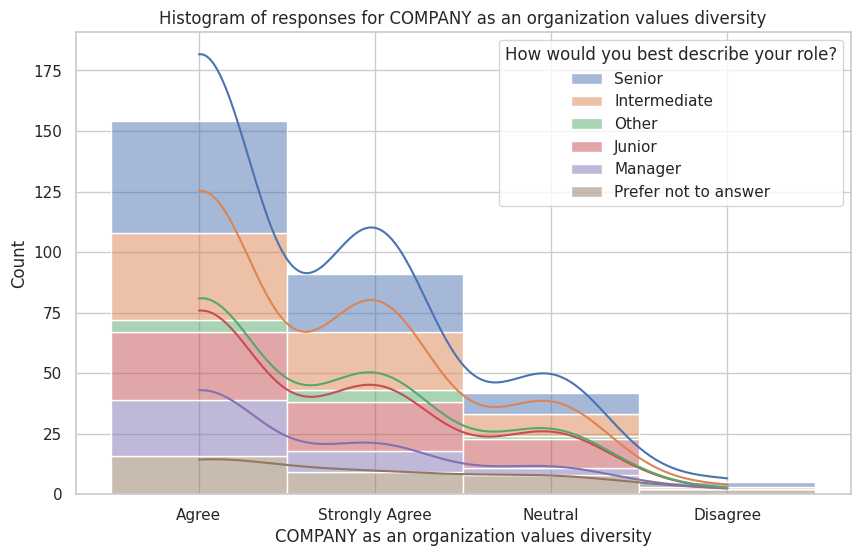

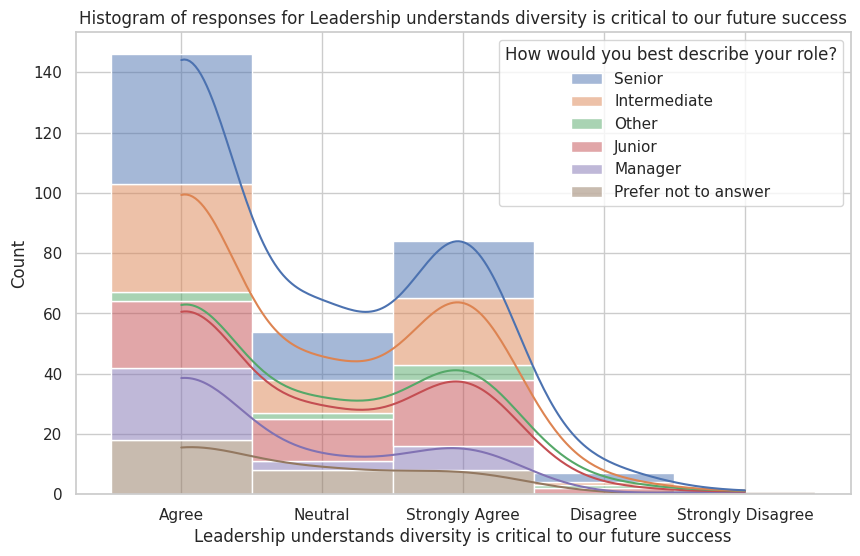

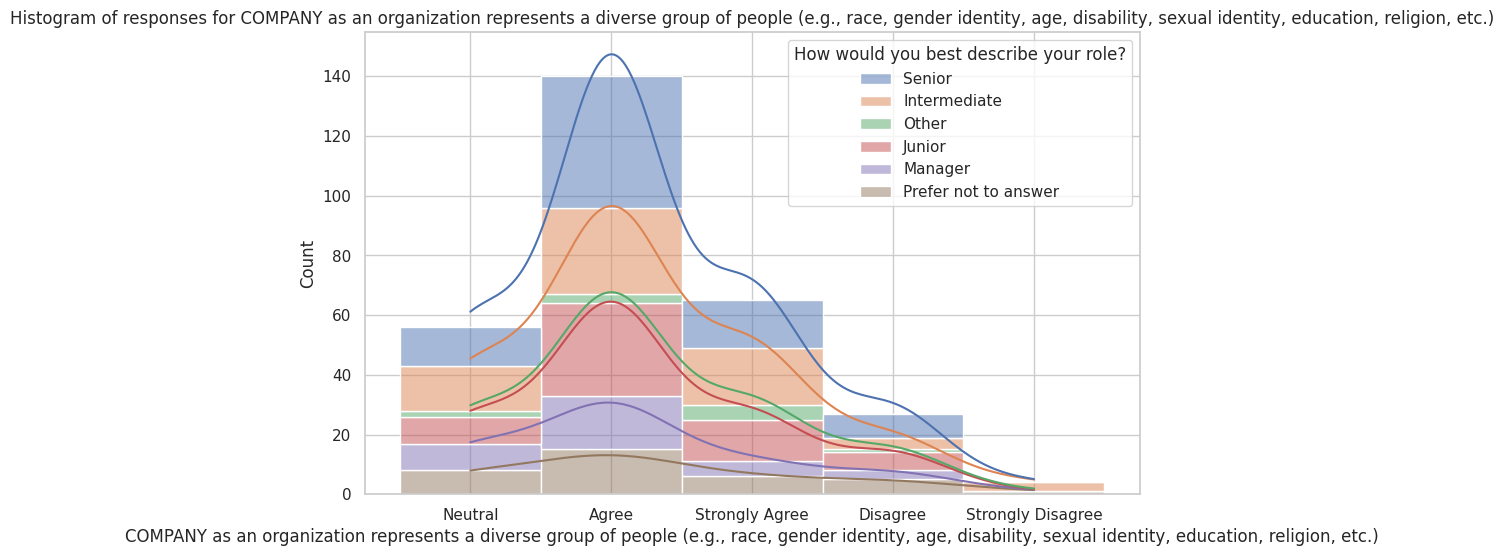

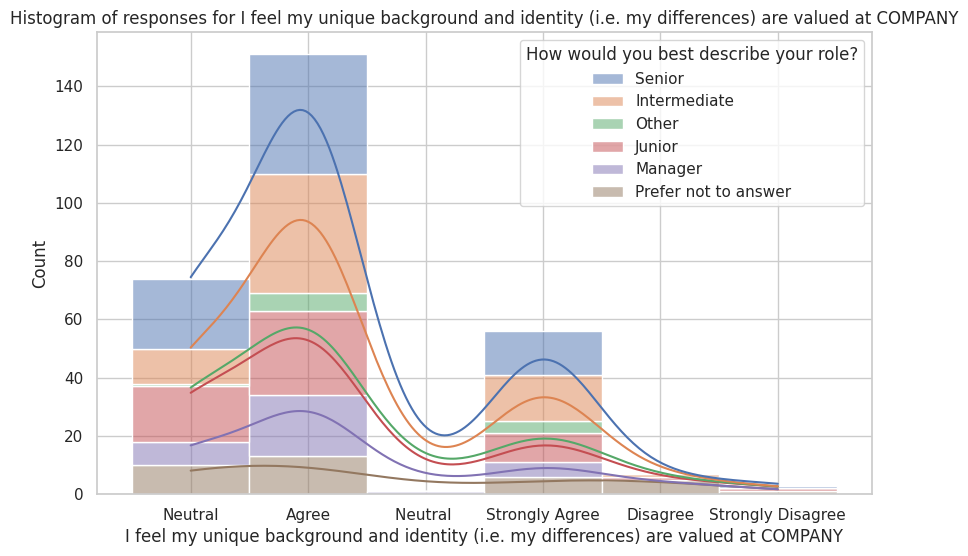

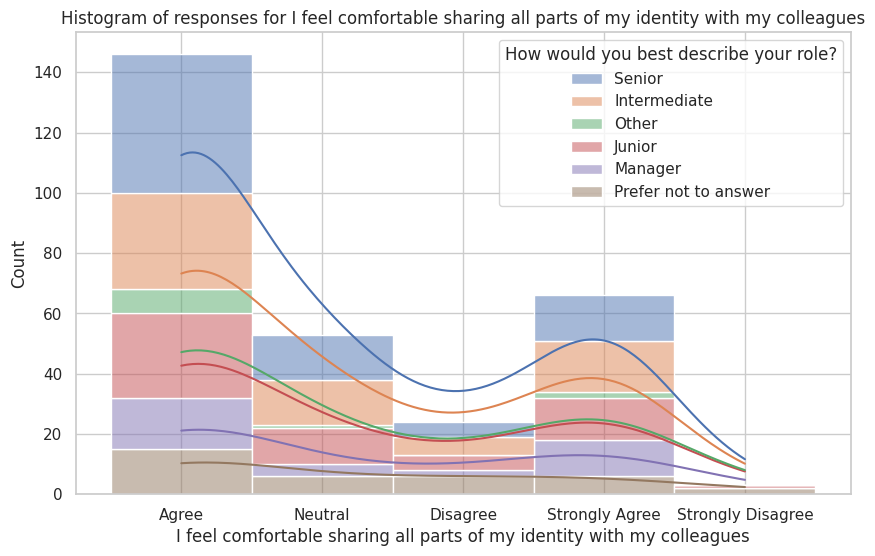

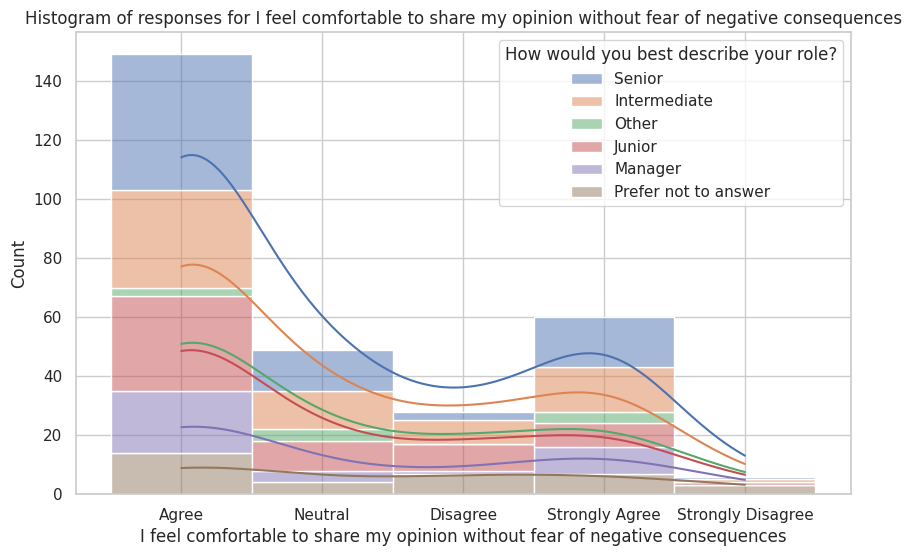

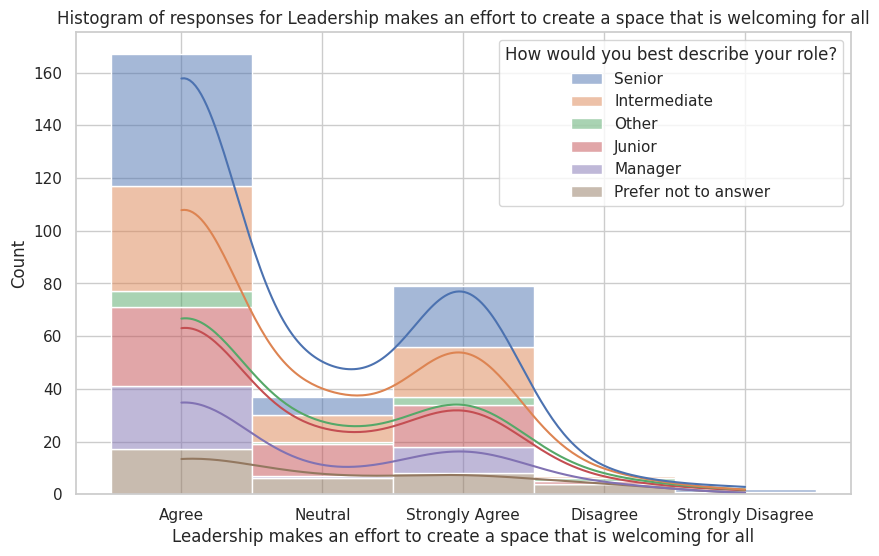

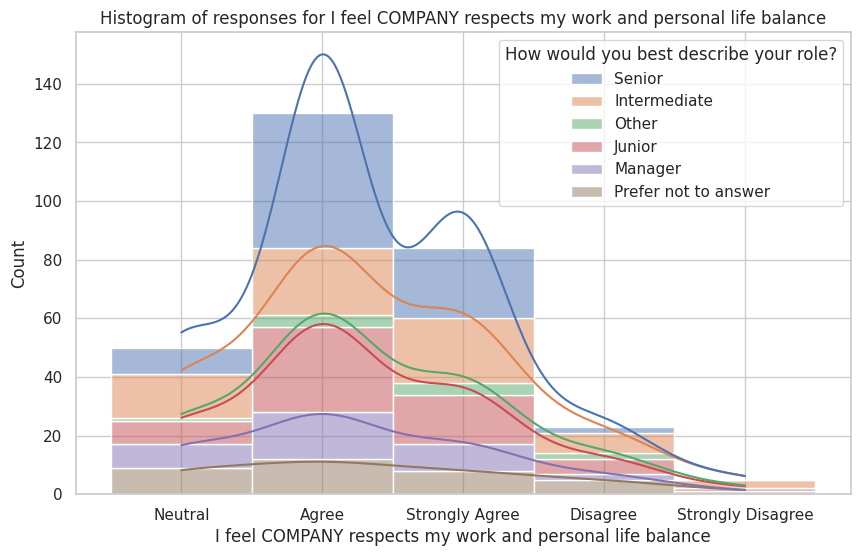

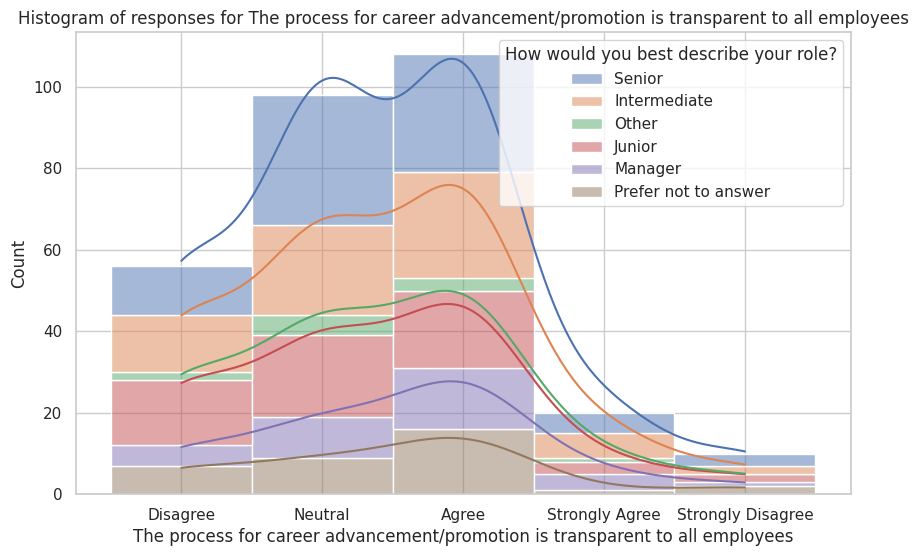

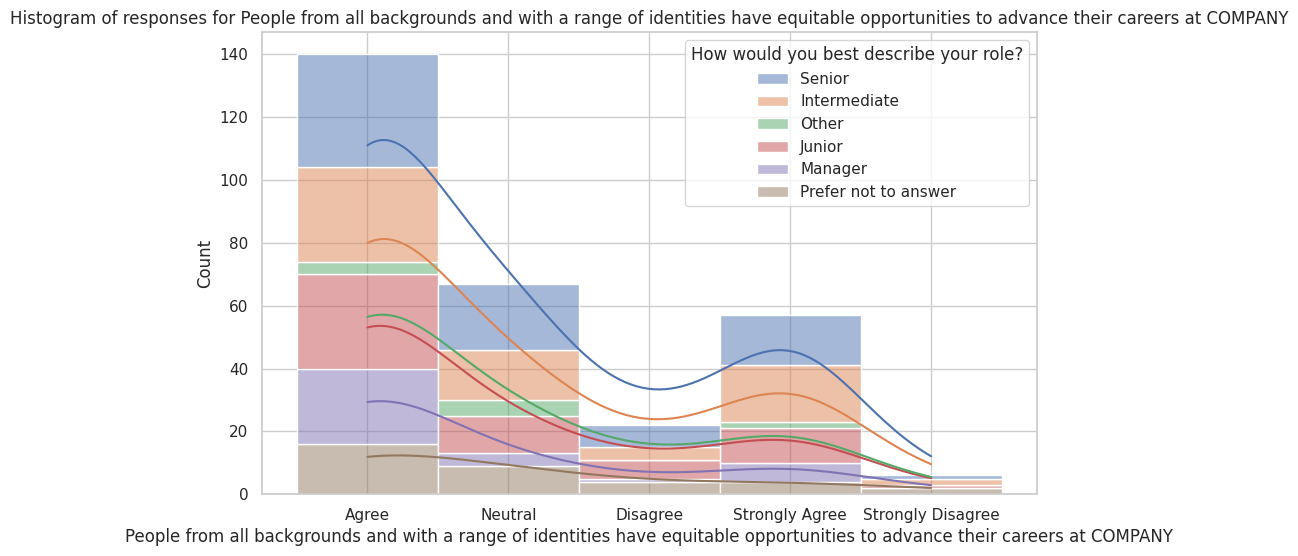

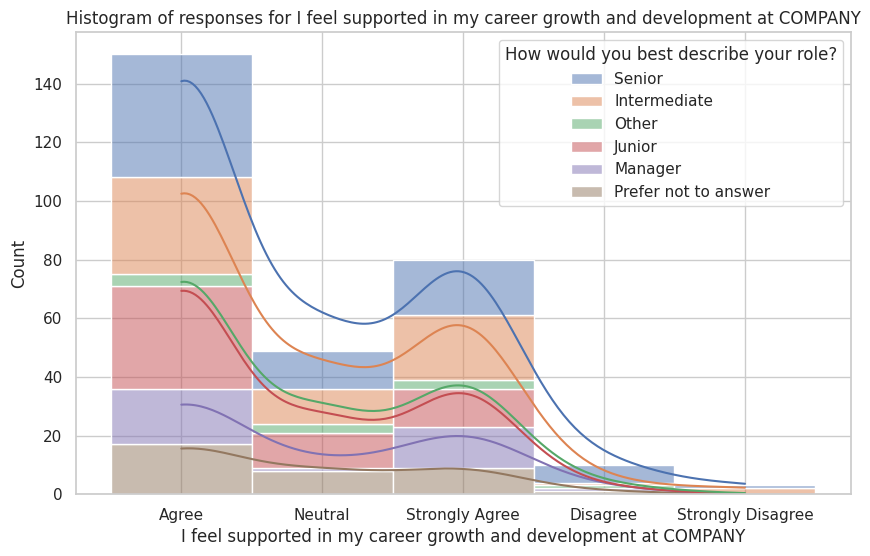

In [ ]:
for col in question_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=col, hue='How would you best describe your role?', kde=True, multiple="stack")
    plt.title(f'Histogram of responses for {col}')
    plt.show()

From these histograms we can safely asssume that the data distribution is not normally distributed. In this case we can use the Kruskal-Wallis test as it's assumoption satifactorily met.

## Perform a Perform Kruskal-Wallis test Indentify differences each roles

In [ ]:
# define question columns
question_columns = df.columns[8:19]

# Create data frames for each role
df_junior = df[df['How would you best describe your role?'] == 'Junior']
df_intermediate = df[df['How would you best describe your role?'] == 'Intermediate']
df_manager = df[df['How would you best describe your role?'] == 'Manager']
df_senior = df[df['How would you best describe your role?'] == 'Senior']

# Perform Kruskal-Wallis test
for col in question_columns:

    stat, p = kruskal(df_junior[col], df_intermediate[col], df_manager[col], df_senior[col])

    # Print results
    print(f'Results for "{col}":')
    print(f'Tes Value H: {stat}')
    print(f'p-value: {p}\n')



Results for "COMPANY as an organization values diversity":
Tes Value H: 2.7809600503559255
p-value: 0.4266438301739496

Results for "Leadership understands diversity is critical to our future success":
Tes Value H: 7.656253526013088
p-value: 0.053676672306194134

Results for "COMPANY as an organization represents a diverse group of people (e.g., race, gender identity, age, disability, sexual identity, education, religion, etc.)":
Tes Value H: 4.908196404454748
p-value: 0.1786442098695264

Results for "I feel my unique background and identity (i.e. my differences) are valued at COMPANY":
Tes Value H: 1.3085236878790112
p-value: 0.7271100441926177

Results for "I feel comfortable sharing all parts of my identity with my colleagues":
Tes Value H: 2.612427646500774
p-value: 0.45531498436111806

Results for "I feel comfortable to share my opinion without fear of negative consequences":
Tes Value H: 1.1898058470652426
p-value: 0.7554503147573177

Results for "Leadership makes an effort to cr

 As we can see from the results, the test did not find statistically significant differences in responses among the different roles for any of the questions. In all cases, the p-value was greater than 0.05, which is the common threshold for determining statistical significance.
 Therefore, we can not reject the null hypythesis and assume there is little to no correaltion between different roles and their survey resoponses.

## Let's perform a similar test for Racial/Ethnic groups

Since there are not enough records of Black people in this sample we will exclude that category for better comparison and more accurate test results.

In [ ]:
# Create a dataframe fromt earlier defined 3 racial groups
df['Racial Group'] = df['What racial/ethnicity groups do you identify with? Select all that apply. - Selected Choice'].apply(classify_race)

In [ ]:
# Create data frames for each racial group
df_white = df[df['Racial Group'] == 'White']
df_poc = df[df['Racial Group'] == 'Indigenous and People of Colour']

# Perform Kruskal-Wallis test
for col in question_columns:

    stat, p = kruskal(df_white[col], df_poc[col])

    # Print results
    print(f'Results for "{col}":')
    print(f'Test value H: {stat}')
    print(f'p-value: {p}\n')

Results for "COMPANY as an organization values diversity":
Test value H: 7.893655207101507
p-value: 0.004960850827361844

Results for "Leadership understands diversity is critical to our future success":
Test value H: 9.202992436886019
p-value: 0.0024161982756602594

Results for "COMPANY as an organization represents a diverse group of people (e.g., race, gender identity, age, disability, sexual identity, education, religion, etc.)":
Test value H: 0.48031988227789413
p-value: 0.48827745882252216

Results for "I feel my unique background and identity (i.e. my differences) are valued at COMPANY":
Test value H: 2.65270580661261
p-value: 0.10337380436714892

Results for "I feel comfortable sharing all parts of my identity with my colleagues":
Test value H: 3.885349849068693
p-value: 0.04870911329756584

Results for "I feel comfortable to share my opinion without fear of negative consequences":
Test value H: 0.005856632657840785
p-value: 0.9389985297846568

Results for "Leadership makes an 

As we can see from the results that in many instances the p-value less than 0.05 suggests a significant difference between the groups. The smaller the p-value, the stronger the evidence that we should reject the null hypothesis.

1. "COMPANY as an organization values diversity": p = 0.00496

2. "Leadership understands diversity is critical to our future success": p = 0.00242

3. "I feel comfortable sharing all parts of my identity with my colleagues": p = 0.0487

4. "People from all backgrounds and with a range of identities have equitable opportunities to advance their careers at COMPANY": p = 0.02607

This is less than 0.05, suggesting that there are significant differences between how the different racial groups percieve the comapny culture.

#Please refer to the Document file for more detailed analysis.